# Data Preprocessing -- Tweets Sentiment Analysis -MIE1624

## Import Libraries


In [53]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import html # for html unescape
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer =PorterStemmer()

from collections import Counter
import wordcloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


#import warnings
#warnings.filterwarnings('ignore') # to get rid of pesky warnings .Used only for final version to ensure the omission of relevant warnings


In [2]:
#Read the generic tweets as a dataframe
g_twt = pd.read_csv("generic_tweets.txt")

In [3]:
# Check if there are any missing values 
g_twt.isnull().sum()

class    0
id       0
date     0
query    0
user     0
text     0
dtype: int64

In [4]:
# to check if the tweets were outcome of any particular query
g_twt["query"].unique()

array(['NO_QUERY'], dtype=object)

In [5]:
# check the distribution of the two different classes 
g_twt["class"].value_counts()

4    100000
0    100000
Name: class, dtype: int64

In [6]:
g_twt["class"].nunique()

2

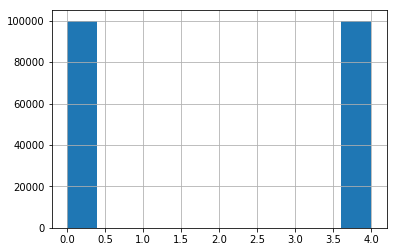

In [7]:
# A histogram can be used to view the distribution of the positive and negative tweets
g_twt["class"].hist()

In [8]:
# isolating the two columns that we need to another variable 
df = g_twt[["class", "text"]]

In [9]:
# converting class 4 to 1 
df["class"] = df["class"].apply(lambda x: 0 if x == 0 else 1 )

/Users/bibinsebastian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
# sanity check 
df["class"].unique()

array([0, 1])

In [11]:
# to compare the lengths after tweet cleaning
df["pre_clean_len"] = df["text"].apply(lambda x : len(x))

/Users/bibinsebastian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
df.head()

,class,text,pre_clean_len
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,is upset that he can't update his Facebook by ...,111
2,0,@Kenichan I dived many times for the ball. Man...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,"@nationwideclass no, it's not behaving at all....",111


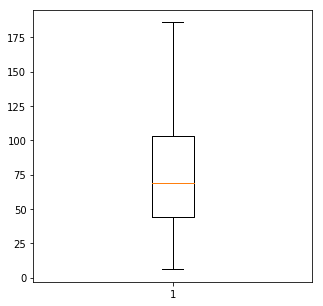

In [13]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()

In [14]:
df.groupby("class").mean()

,pre_clean_len
class,
0,73.76126
1,74.15825


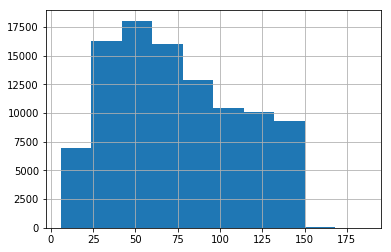

In [15]:
df[df["class"] ==0].pre_clean_len.hist()

/Users/bibinsebastian/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/bibinsebastian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/bibinsebastian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


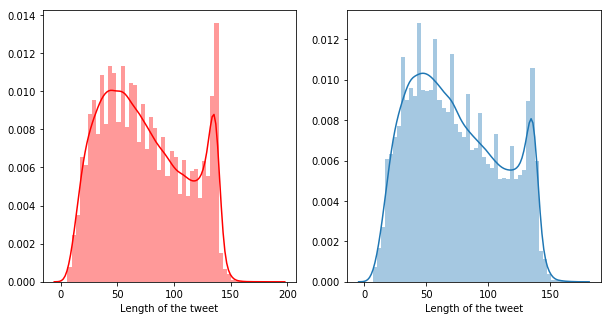

In [16]:
fig, (ax1,ax2) =plt.subplots(ncols=2,nrows=1,figsize = (10,5))
sns.distplot(df[df["class"] ==0].pre_clean_len, ax=ax1,axlabel="Length of the tweet",norm_hist=False,color="red")
sns.distplot(df[df["class"] ==1].pre_clean_len, ax=ax2,axlabel="Length of the tweet")

In [34]:
stop_w_nltk = stopwords.words("english")

In [35]:

def clean(text):
    '''
    Function to force lower case , remove html tags and attributes, html character codes and replace with ASCII equivalent,
    URLs
    '''
    text = html.unescape(text) # to replace html character codes with ASCII equivalent
    text = text.lower() # lower the whole text 
    text = " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())# remove @tags, special chars , links 
    text = [word for word in text.split() if word not in stop_w_nltk] # remove Stop words
    text = [stemmer.stem(word) for word in text]
    return(text)
    
    

In [18]:
%ls


Assignment+1+Fall+2018.pdf  corpus.txt
Assignment1.ipynb           generic_tweets.txt
TUT/                        scratch.ipynb
US_airline_tweets.csv       stop_words.txt


In [19]:
stop_w_g = open('stop_words.txt', 'r').read().splitlines()


In [21]:
# run clean function on the text 
df["cleaned"] = df["text"].apply(clean)

/Users/bibinsebastian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
df.isnull().sum()

class            0
text             0
pre_clean_len    0
cleaned          0
dtype: int64

In [23]:
df["post_clean_len"] = df["cleaned"].apply(lambda x : len(x))

/Users/bibinsebastian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/Users/bibinsebastian/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/bibinsebastian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/bibinsebastian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


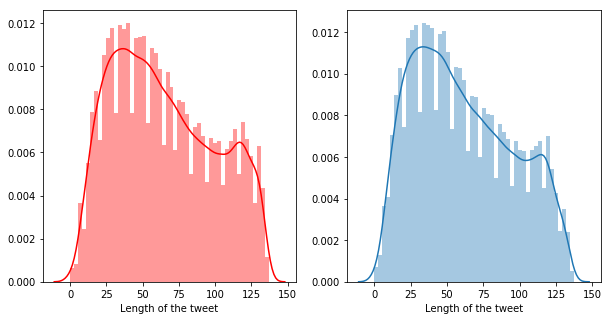

In [24]:
#distribution of the length of the tweets after cleaning. 
fig, (ax1,ax2) =plt.subplots(ncols=2,nrows=1,figsize = (10,5))
sns.distplot(df[df["class"] ==0].post_clean_len, ax=ax1,axlabel="Length of the tweet",norm_hist=False,color="red")
sns.distplot(df[df["class"] ==1].post_clean_len, ax=ax2,axlabel="Length of the tweet")

In [25]:
df["processed"] = df["cleaned"].apply(preprocess)

In [26]:
df

,class,text,pre_clean_len,cleaned,post_clean_len,processed
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,awww that s a bummer you shoulda got david car...,71,"[awww, bummer, shoulda, got, david, carr, thir..."
1,0,is upset that he can't update his Facebook by ...,111,is upset that he can t update his facebook by ...,105,"[upset, updat, facebook, text, might, cri, res..."
2,0,@Kenichan I dived many times for the ball. Man...,89,i dived many times for the ball managed to sav...,76,"[dive, mani, time, ball, manag, save, 50, rest..."
3,0,my whole body feels itchy and like its on fire,47,my whole body feels itchy and like its on fire,46,"[whole, bodi, feel, itchi, like, fire]"
4,0,"@nationwideclass no, it's not behaving at all....",111,no it s not behaving at all i m mad why am i h...,88,"[behav, mad, see]"
5,0,@Kwesidei not the whole crew,29,not the whole crew,18,"[whole, crew]"
6,0,Need a hug,11,need a hug,10,"[need, hug]"
7,0,@LOLTrish hey long time no see! Yes.. Rains a...,99,hey long time no see yes rains a bit only a bi...,77,"[hey, long, time, see, ye, rain, bit, bit, lol..."
8,0,@Tatiana_K nope they didn't have it,36,k nope they didn t have it,26,"[k, nope]"
9,0,@twittera que me muera ?,25,que me muera,12,"[que, muera]"


In [27]:
?Counter

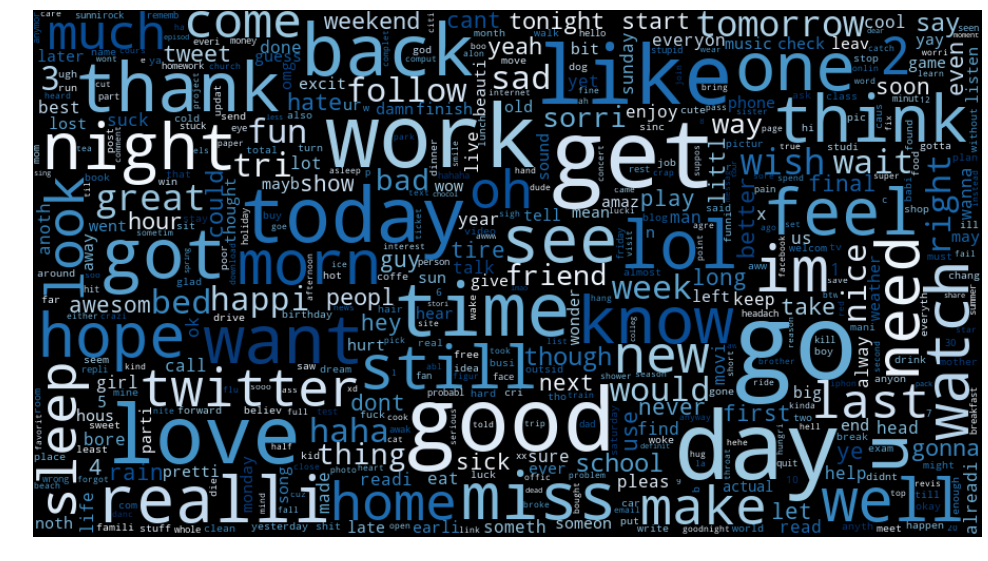

In [28]:
all_words = []
for line in df['processed']: # try 'tokens'
    all_words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(all_words)

# draw a Word Cloud with word frequencies
wordcloud = wordcloud.WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)

plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

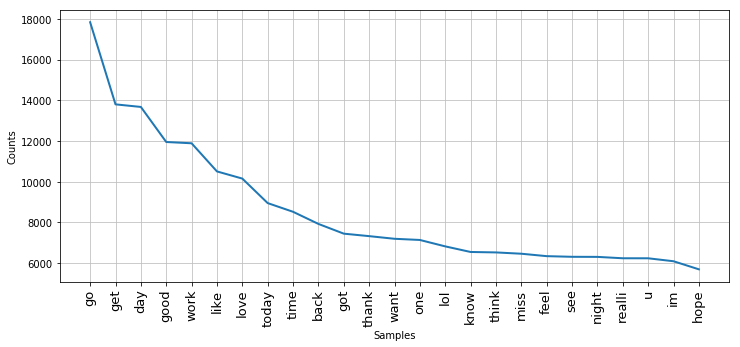

Text(0.5, 0, 'Word Rank')

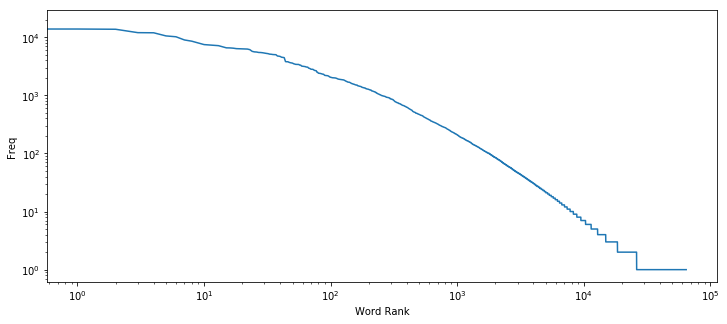

In [29]:
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(wordfreq)
fd.plot(25,cumulative=False)


word_counts = sorted(Counter(wordfreq).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")


In [118]:
# Vectorising -Using bag of words model 
cv = CountVectorizer(analyzer=clean)

In [119]:
bag_of_words = cv.fit(df['text'])

In [39]:
len(bag_of_words.vocabulary_)

64466

In [40]:
len(bag_of_words.vocabulary_)
bag_of_words = cv.transform(df['text'])


In [56]:
bag_of_words.shape

(200000, 64466)

In [44]:
d = TfidfTransformer().fit(bag_of_words)
e = d.transform(bag_of_words)

In [46]:
from sklearn.model_selection import train_test_split
X = e
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [49]:
log = LogisticRegression()

In [50]:
log.fit(X_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [98]:
y_pred = log.predict(X_test)

In [99]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test , y_pred))

[[22272  7576]
 [ 6604 23548]]


In [100]:
print (round(accuracy_score(y_test , y_pred) , 3))

0.764


In [57]:
from sklearn.naive_bayes import MultinomialNB

In [74]:
l = MultinomialNB(alpha=0.9)

In [75]:
l.fit(X_train , y_train)

MultinomialNB(alpha=0.9, class_prior=None, fit_prior=True)

In [76]:
y_pred_nb = l.predict(X_test)

In [77]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test , y_pred_nb))

[[22908  6940]
 [ 8359 21793]]


In [78]:
accuracy_score(y_test , y_pred_nb)

0.7450166666666667

In [79]:
from sklearn import svm

In [81]:
ls = svm.LinearSVC()
ls.fit(X_train , y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [83]:
y_pred_svm = ls.predict(X_test)
print (confusion_matrix(y_test , y_pred_svm))

[[22076  7772]
 [ 7006 23146]]


In [85]:
accuracy_score(y_test , y_pred_svm)

0.7537

In [87]:
from xgboost import XGBClassifier

In [93]:
clf = XGBClassifier(max_depth=25, silent=False, n_estimators=200,n_jobs = -1 )

In [94]:
clf.fit(X_train , y_train)

[01:32:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2370 extra nodes, 0 pruned nodes, max_depth=25
[01:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2220 extra nodes, 0 pruned nodes, max_depth=25
[01:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2108 extra nodes, 0 pruned nodes, max_depth=25
[01:32:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2174 extra nodes, 0 pruned nodes, max_depth=25
[01:32:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2124 extra nodes, 0 pruned nodes, max_depth=25
[01:32:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2142 extra nodes, 0 pruned nodes, max_depth=25
[01:32:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2062 extra nodes, 0 pruned nodes, max_depth=25
[01:32:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2018 extra nodes, 0 pruned nodes, max_depth=25
[01:32:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1828 extra n

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=25, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=False, subsample=1)

In [95]:
y_pred_xgb = clf.predict(X_test)
print (confusion_matrix(y_test , y_pred_xgb))

[[18546 11302]
 [ 5191 24961]]


/Users/bibinsebastian/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [97]:
accuracy_score(y_test , y_pred_xgb)

0.7251166666666666

In [101]:
%ls


Assignment+1+Fall+2018.pdf  corpus.txt
Assignment1.ipynb           generic_tweets.txt
TUT/                        scratch.ipynb
US_airline_tweets.csv       stop_words.txt


In [103]:
air = pd.read_csv("US_airline_tweets.csv")

In [105]:
air1 = air[["sentiment", "text"]]

In [109]:
air1["sentiment"]= air1["sentiment"].map({'positive':1,"negative":0})

/Users/bibinsebastian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0        1
1        0
2        0
3        0
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       0
12       1
13       0
14       1
15       1
16       0
17       1
18       1
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       1
27       1
28       1
29       0
        ..
11511    0
11512    0
11513    0
11514    0
11515    0
11516    0
11517    0
11518    0
11519    0
11520    0
11521    1
11522    0
11523    1
11524    0
11525    0
11526    0
11527    1
11528    0
11529    1
11530    0
11531    0
11532    1
11533    0
11534    1
11535    0
11536    0
11537    0
11538    1
11539    0
11540    0
Name: sentiment, Length: 11541, dtype: int64

In [120]:
#len(bag_of_words_1.vocabulary_)
bag_of_words_1 = cv.transform(air1['text'])

In [121]:
d = TfidfTransformer().fit(bag_of_words_1)
e = d.transform(bag_of_words_1)

In [122]:
y_pred = log.predict(e)

In [123]:

print (confusion_matrix(air1["sentiment"] , y_pred))

[[6364 2814]
 [ 282 2081]]


In [124]:
accuracy_score(air1["sentiment"] , y_pred)

0.7317390174161684

In [163]:
t = air1[air1["sentiment"] == y_pred]

In [166]:
e.shape

(11541, 64466)

,sentiment,text
1,0,@VirginAmerica it's really aggressive to blast...
8,1,@VirginAmerica This is such a great deal! Alre...
20,0,@VirginAmerica status match program. I applie...
22,0,@VirginAmerica amazing to me that we can't get...
23,0,@VirginAmerica hi! I just bked a cool birthday...
25,0,"@VirginAmerica awaiting my return phone call, ..."
30,1,"@VirginAmerica View of downtown Los Angeles, t..."
31,0,"@VirginAmerica Hey, first time flyer next week..."
35,0,@VirginAmerica hi! i'm so excited about your $...
36,1,@VirginAmerica you know it. Need it on my spot...


In [159]:
t

,sentiment,text
1,0,@VirginAmerica it's really aggressive to blast...
8,1,@VirginAmerica This is such a great deal! Alre...
20,0,@VirginAmerica status match program. I applie...
22,0,@VirginAmerica amazing to me that we can't get...
23,0,@VirginAmerica hi! I just bked a cool birthday...
25,0,"@VirginAmerica awaiting my return phone call, ..."
30,1,"@VirginAmerica View of downtown Los Angeles, t..."
31,0,"@VirginAmerica Hey, first time flyer next week..."
35,0,@VirginAmerica hi! i'm so excited about your $...
36,1,@VirginAmerica you know it. Need it on my spot...
